# Useful Functions

## normalize() & normalize2()

In [94]:
#Funcion global para normalizar
def normalize(lis,m):
 lis2 =[]
 for i in range(len(lis)):
  lis2.append(round(lis[i]/ m, 2))
 return lis2

 #Normalizar para usar poker
def normalize2(lis,m):
 lis2 =[]
 for i in range(len(lis)):
  lis2.append(round(lis[i]/ m, 3))
 return lis2

## getInterval(start, end, L, num)

In [88]:
import numpy as np
import math

In [104]:
# Asumiendo que num pertenece al rango [start, end], y que dicho rango
# está dividido en L intervalos, devuelve el número de intervalo.
# Los intervalos se enumeran desde 0 hasta L-1.
# siendo el intervalo [0.1,0.2) el intervalo 1, para start = 0, end = 1, L = 10.
# El último intervalo es cerrado en ambos extremos, y los demás son cerrados
# en el extremo inferior y abiertos en el extremo superior.
def getInterval(start, end, L, num):
    if (num > end):
        print("Error: número fuera de rango")
        return

    intervalSize = (end - start) / L
    interval = math.floor((num - start) / intervalSize)
    if (interval == L):
        interval = L - 1
    return interval

In [93]:
getInterval(0, 1, 10, 0.15)

1

# Chi-square testing

In [81]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math


## Previous steps

In [237]:
data = np.array([
    0.74, 0.58, 0.15, 0.47, 0.72, 0.18, 0.46, 0.57,
    0.81, 0.98, 0.42, 0.31, 0.24, 0.17, 0.95, 0.69,
    0.53, 0.93, 0.01, 0.36, 0.88, 0.01, 0.37, 0.73,
    0.62, 0.66, 0.37, 0.67, 0.60, 0.13, 0.14, 0.13,
    0.12, 0.56, 0.56, 0.41, 0.46, 0.32, 0.36, 0.98 
])
data.size

40

In [83]:
c = math.ceil( math.sqrt(data.size) )
c

7

### Obtained frequencies for a given number of classes

In [84]:
def getOF( dataArr, c , maxVal):
    dataArr = np.sort(dataArr)
    delta = maxVal / c
    of = np.zeros( c , dtype=int)

    index = 0
    for i in range( c ):
        while dataArr[index] <= (i+1)*delta:
            of[i] += 1
            index += 1
            if index >= dataArr.size:
                break
    return of


In [85]:
observedF = getOF(data, c, 1)
observedF

array([6, 4, 8, 7, 6, 4, 5])

### Expected Frequencies for a given number of classes in uniform distribution

In [86]:
def getEF( c , n):
    ef = np.array( [n/c] * c )
    return ef

In [87]:
expectedF = getEF(c, data.size)
expectedF

array([5.71428571, 5.71428571, 5.71428571, 5.71428571, 5.71428571,
       5.71428571, 5.71428571])

## Chi2 test development

In [88]:
chi2Calc = np.sum( (observedF - expectedF)**2 / expectedF )
chi2Calc

2.3499999999999996

In [89]:
criticVal = stats.chi2.ppf(q = 0.95, df = c-1)
print("criticVal: ", criticVal)

criticVal:  12.591587243743977


In [90]:
pVal = 1 - stats.chi2.cdf(x=chi2Calc,  # Find the p-value
                             df=c-1)
print("pVal: ", pVal)

pVal:  0.8848628827373295


## chi2 with Scipy

In [91]:
# c is the number of classes
stats.chisquare( getOF(data, c, 1), getEF(c, data.size) )


Power_divergenceResult(statistic=2.3499999999999996, pvalue=0.8848628827373295)

In [92]:
criticVal = stats.chi2.ppf(q = 0.95, df = c-1)
print("criticVal: ", criticVal)

criticVal:  12.591587243743977


# Poker testing

In [93]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math


## Classification

Numbers are classified afther the number of repeated decimals they have.  
For two decimals, numbers can have either 0 or 1 repetitions (if both decimals are equal).

In [94]:
# areDecimalsEqual returns 1 if the first and second decimal places are equal
def areDecimalsEqual(number):
    firstDec = math.floor(number*1e1 % 10)
    secondDec = math.floor(number*1e2 % 10)
    if (firstDec == secondDec):
        return 1
    else:
        return 0


In [95]:
tArr = np.array([0.55, 0.32, 0.33])
mapped = np.array(list(map(areDecimalsEqual, tArr)))
mapped

array([1, 0, 1])

In [96]:
def mapEqualDecimals( dataArr ):
    return np.array(list(map(areDecimalsEqual, dataArr)))

In [97]:
classifiedData = mapEqualDecimals(data)

In [98]:
# Observed frequencies:
# OF[0] =: Numbers with different decimals
# OF[1] =: Numbers with repeated decimals
OF = pd.DataFrame([data.size - classifiedData.sum(), classifiedData.sum()])
print(OF)

    0
0  38
1   2


Expected Frequencies:
For two decimals, the probability of being equal is: $$(10*1) / (10*10)$$
$$= 1/10 = 0.1$$
Then, for $$40$$ values, the expected number of repetitions if $$4$$

In [99]:
EF = pd.DataFrame([40-4, 4])
print(EF)

    0
0  36
1   4


## Chi square test

In [100]:
# scipy way
stats.chisquare(OF, EF)

Power_divergenceResult(statistic=array([1.11111111]), pvalue=array([0.29184055]))

In [101]:
chi2Calc = ((OF - EF)**2 / EF).sum()
print("chi2Calc: ", chi2Calc[0])

chi2Calc:  1.1111111111111112


In [102]:
criticVal = stats.chi2.ppf(q = 0.95, df = 1)
print("criticVal: ", criticVal)

criticVal:  3.841458820694124


In [103]:
p_value = 1 - stats.chi2.cdf(x=chi2Calc,  # Find the p-value
                             df=1)
print("p_value: ", p_value)

p_value:  [0.29184055]


p_value is greater than 0.05, which is equivalent to say that 
our chi2Calc is less than the critical value criticVal, so the
data set passes the poker test.

# Kolmogorov-smirnov

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from math import sqrt, ceil, floor
import random


In [28]:
# n := Cantidad de números aleatorios
# c := Cantidad de intervalos

# e.g.
# n =  1000
# c = ceil(sqrt(n))
# gl = n  # Grados de libertad

def uniformePEA(n):
    c = ceil(sqrt(n))
    lis = np.array([1/c * (i + 1) for i in range(c)])
    return lis

In [29]:
lsU_PEA = uniformePEA(100)
print(lsU_PEA)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## classifyKS with nested for

In [30]:
def classifyKSWithNestedFor(data, maxVal):
    n = len(data)
    c = ceil(sqrt(n))
    print(f"c = {c}")
    freqList = np.zeros(c, dtype = int)
    for i in range(n):
        for j in range (0, c):
            interv = c - 1
            if (data[i] == maxVal):
                freqList[c - 1] += 1
                break
            if (data[i] < ((j + 1) *(maxVal / c)) ): # Problemas con maxVal para < ; 
                                        # Se incluye el primer valor del siguiente intervalo para <=
                freqList[j] += 1
                break
    return freqList

In [31]:
tArr = np.array([0.55, 0.32, 0.333, 0.99, 0.05, 0.34, 0.25, 0.98, 0.56, 0.8, 1])
classifyKSWithNestedFor(tArr, 1)

c = 4


array([1, 4, 2, 4])

## countFreqs, classifyKS

In [32]:
def countFreqs(data, maxVal, c):
    n = len(data)
    freqList = np.zeros(c, dtype = int)
    for i in range(n):
        if (data[i] == maxVal):
            freqList[c - 1] += 1
        else:
            freqList[floor( (data[i] * c / maxVal) )] += 1
    return freqList

In [33]:
countFreqs(tArr, 1, ceil(sqrt(len(tArr))))

array([1, 4, 2, 4])

In [34]:
# for c = ceil(sqrt(n))

def classifyKS(data, maxVal):
    n = len(data)
    c = ceil(sqrt(n))
    freqList = countFreqs(data, maxVal, c)
    return freqList

In [35]:
classifyKS(tArr, 1)

array([1, 4, 2, 4])

## dmCalc_kolmogorov_Smirnov

In [36]:
# Calcula el DMcalc del test de Kolmogorov-Smirnov
def dmCalc_kolmogorov_Smirnov(n, lisFO):
    c = len(lisFO)
    gl = n  # Grados de libertad

    lisPEA = uniformePEA(n)

    lisFOA = np.cumsum(lisFO)

    lisPOA = list ( map ( lambda x: x / n , lisFOA ))

    v1 = lisPEA[0]
    v2 = lisPOA[0]

    difs = np.abs(lisPEA - lisPOA)
    d = round(difs.max(), 2)

    return d

In [37]:
foEj = [11, 6, 16, 9, 7, 11, 10, 9, 15, 6]  # Frecuencias Observadas de ejemplo visto en clase
dmCalc_kolmogorov_Smirnov(100, foEj)  # Arroja el mismo valor para DMcalc obtenido en el ejemplo visto en clase

0.04

In [38]:
# Genera un arreglo con observaciones para intervalos de diez enteros 
# en base a un arreglo de frecuencias observadas arrayFO
def crearObservacioens(arrayFO):
    ejObs = []
    for i in range (len(arrayFO)):
        for j in range(arrayFO[i]):
            ejObs.append((10 * i) + random.randint(0,9))
    return ejObs

In [39]:
ejObs = crearObservacioens(foEj)
len(ejObs)

100

## critValKolmogorov

In [40]:
# for a 0.01, 0.05 or 0.10 significance level
def critValKolmogorov(n, significanceLevel):
    if (significanceLevel == 0.01):
        if (n > 20):
            return 1.63 / sqrt(n)

        elif (n == 5):
            return 0.669
        elif (n == 8):
            return 0.543
        elif (n == 10):
            return 0.490
        elif (n == 12):
            return 0.450
        elif (n == 15):
            return 0.404
        elif (n == 20):
            return 0.356
    elif (significanceLevel == 0.05):
        if (n > 20):
            return 1.36 / sqrt(n)

        elif (n == 5):
            return 0.565
        elif (n == 8):
            return 0.457
        elif (n == 10):
            return 0.410
        elif (n == 12):
            return 0.375
        elif (n == 15):
            return 0.338
        elif (n == 20):
            return 0.294
    elif (significanceLevel == 0.10):
        if (n > 20):
            return 1.22 / sqrt(n)

        elif (n == 5):
            return 0.510
        elif (n == 8):
            return 0.411
        elif (n == 10):
            return 0.368
        elif (n == 12):
            return 0.338
        elif (n == 15):
            return 0.304
        elif (n == 20):
            return 0.264


## kolmogorovTest

In [41]:
# Funciona para los valores de n: {5, 8, 10, 12, 15, 20}, para n > 20 
# y para una significancia de 0.01, 0.05 o 0.10 
def kolmogorovTest(data, maxVal, significanceLevel):
    n = len(data)
    lisFo = classifyKS(data, maxVal)
    dmCalc = dmCalc_kolmogorov_Smirnov(n, lisFo)
    critVal = critValKolmogorov(n, significanceLevel)
    print(f"dmCalc = {dmCalc}")
    print(f"critVal = {critVal}")
    if (dmCalc > critVal):
        #print("Se rechaza la hipotesis nula")
        return False
    else:
        #print("No se rechaza la hipotesis nula")
        return True

kolmogorovTest(data, max(data), 0.05) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba

dmCalc = 0.27
critVal = 0.136


False

## KS with Scipy 
https://www.statology.org/kolmogorov-smirnov-test-python/

In [42]:
from numpy.random import seed
from numpy.random import poisson
from scipy.stats import kstest
import seaborn as sns
import numpy as np

In [43]:
#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)
data

array([ 9,  5,  6,  5,  5,  8,  4,  5,  4,  3,  3,  7,  3,  3,  4,  5,  2,
        1,  7,  7, 10,  5,  8,  8,  6,  4,  4,  3,  1,  5,  6,  5,  5,  4,
        1,  7,  2,  7,  6,  2,  6,  5,  7,  5,  4,  5, 10,  6,  4,  7,  3,
        2,  2,  6,  2,  5,  3,  6,  2,  4,  4,  4,  8,  7, 11,  3,  4,  1,
        4,  5,  1,  2,  2,  5,  5,  5,  7,  8,  4,  6,  4, 10,  3,  8,  5,
        7,  3,  8,  2,  1,  4,  4,  4,  4,  6,  4, 12,  1,  6,  3])

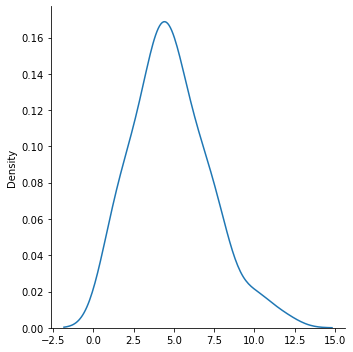

In [44]:
sns.displot(data, kind="kde")

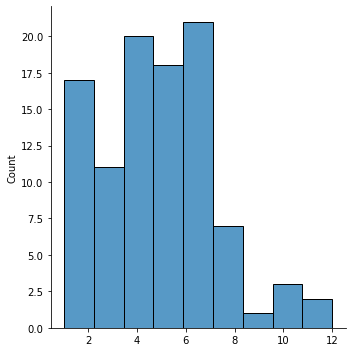

In [45]:
sns.displot(data, kind= 'hist')

In [46]:
#perform Kolmogorov-Smirnov test
kstest(data, 'norm')

# From the output we can see that the test statistic is 0.9072 and 
# the corresponding p-value is 1.0908e-103. Since the p-value is less than .05, 
# we reject the null hypothesis. We have sufficient evidence to say that 
# the sample data does not come from a normal distribution.

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170218e-103)

In [47]:
kstest(data, ('poisson', 5))

KstestResult(statistic=0.5, pvalue=0.5338769171034751)

# Series

In [128]:
import numpy as np
import math

## Observed Frequencies Matrix

In [170]:
# k := Cantidad de dimensiones
def obsFreqMatrixSeries(datos, maxVal, k):
    datos = normalize(datos, maxVal)
    n = len(datos)
    g = int(n / k)       # Cantidad de grupos (tuplas)
    #c = ceil(sqrt(g))   # Cantidad de clases
    intervs = ceil( pow( g, 1/(2*k) ) )  # Cantidad de intervalos para cada dimensión

    obsFreqs = np.zeros((intervs ** (k - 1),intervs), dtype=int)   
    
    for i in range (g):
        col = getIntervalSeries(intervs, datos[i * k + (k - 1)])
        row = 0
        for dim in range (k - 1):
            row += getIntervalSeries(intervs, datos[i * k + dim]) * (intervs ** (k - dim - 2))
        obsFreqs[row][col] += 1
    return obsFreqs

In [225]:
tData = np.array([0.96, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81])
tData.shape

(16,)

In [226]:
obsFreqMatrixSeries(tData, 1, 2)

array([[3, 1],
       [1, 3]])

## Expected Frequencies Matrix

In [227]:
def expectedFreqsMatrixSeries(datos, maxVal, k):
    datos = normalize(datos, maxVal)
    n = len(datos)
    g = int(n / k)       # Cantidad de grupos (tuplas)
    #c = ceil(sqrt(g))   # Cantidad de clases
    intervs = ceil( pow( g, 1/(2*k) ) )  # Cantidad de intervalos para cada dimensión

    ef = g / (intervs ** k)
    efMatrix = np.full((intervs ** (k - 1),intervs), ef, dtype=float)
    return efMatrix
    

In [228]:
expectedFreqsMatrixSeries(tData, 1, 2)

array([[2., 2.],
       [2., 2.]])

## Series Test

In [245]:
# k := Cantidad de dimensiones
def testSeries(datos, maxVal, k, significanceLevel):
    conf = 1 - significanceLevel
    n = len(datos)
    g = int(n / k)       # Cantidad de grupos (tuplas)
    intervs = ceil( pow( g, 1/(2*k) ) )  # Cantidad de intervalos para cada dimensión

    obsMatrix = obsFreqMatrixSeries(datos, maxVal, k)

    # Expected frequency:
    ef = g / (intervs ** k)
    
    finalMatrix = ((ef - obsMatrix)**2) / ef
    print(finalMatrix)

    # Valor calculado para la prueba de Chi cuadrado
    calculated = np.sum(finalMatrix)

    freedomDegrees = (intervs ** k) - 1

    # Prueba de Chi2 directa entre obsMatrix y una matriz con los valores esperados.
    chi2Result = stats.chisquare( obsMatrix.reshape(intervs**k), np.full((intervs ** k), ef) )
    print( f"Chi2 directa: {chi2Result}" )
    print ((1-chi2Result[1]) < conf)

    # 
    # Valor crítico
    criticVal = stats.chi2.ppf(conf, freedomDegrees)

    # resultado manual
    print("Valor calculado: ", calculated) #¿Siempre da cero?
    print("Valor crítico: ", criticVal)
    return calculated <= criticVal

In [246]:
testSeries(tData, 1, 2, 0.1)

[[0.5 0.5]
 [0.5 0.5]]
Chi2 directa: Power_divergenceResult(statistic=2.0, pvalue=0.5724067044708798)
True
Valor calculado:  2.0
Valor crítico:  6.251388631170325


True

In [247]:
data

array([0.74, 0.58, 0.15, 0.47, 0.72, 0.18, 0.46, 0.57, 0.81, 0.98, 0.42,
       0.31, 0.24, 0.17, 0.95, 0.69, 0.53, 0.93, 0.01, 0.36, 0.88, 0.01,
       0.37, 0.73, 0.62, 0.66, 0.37, 0.67, 0.6 , 0.13, 0.14, 0.13, 0.12,
       0.56, 0.56, 0.41, 0.46, 0.32, 0.36, 0.98])

In [248]:
testSeries(data, 1, 2, 0.1)

[[0.02222222 0.27222222 2.22222222]
 [0.27222222 0.27222222 1.42222222]
 [0.02222222 0.67222222 0.02222222]]
Chi2 directa: Power_divergenceResult(statistic=5.199999999999999, pvalue=0.7360016443852392)
True
Valor calculado:  5.199999999999999
Valor crítico:  13.36156613651173


True